# Support Vector Machines (SVMs)
---

<!-- TABLE OF CONTENTS -->

**IMPORTANT NOTES:** 

**1.** I will be implementing a linear SVM (solely linear kernel) in this notebook and 
will have a serperate notebook that will introduce kernels and non-linear SVMs.

**2.** I recommend that you download this notebook as sometimes github doesn't render the equations properly.

**3.** Please message me with any questions, typos, or bugs. I will give you the proper credit at the bottom of this notebook if any "noteable" bugs are found.

## Table of Contents: 
1. Support Vector Machines Defined
2. The Margin
3. Primal Form Derivation
4. The Lagrangian and the Karush-Kuhn-Tucker (KKT) Conditions
5. Dual Form Derivation
6. CVXOPT
7. Python Implimentation

<br />

---


## Support Vector Machines

The Support Vector Machine (SVM) is another form of supervised learning of a classifier. Specifically, SVM's are a type of margin maximizer that along with a kernel (more on this in another notebook) can become a very powerful tool. 

<center>
    <img src="img/svm_imgs/svm_example_dt.png" width="400" height="200"> 
</center>

Other models for supervised learning of a binary classifier such the Perceptron Algorithm 
can garantee convergence, though there is no garentee on "how well" the hyperplane will
generalize to unseen data. The key insight that lead to the derivation of SVMs was the 
idea that we would not only like our model to converge, but we would like our model to 
give us the "best possible" hyperplane. Though how does one define the "best possible"
hyperplane? Well one definition, and the definition we will be using, of the "best possible" 
hyperplane may be the hyperplane that maximizes the distance between the two binary classes.
We will define this distance as the margin, therefore the SVM is a type of margin maximizer.

---

## The Margin

Given a dataset $X \in \mathbb{R}^{D x N}$ with classes $y \in \{ -1, 1 \}$, weights 
$w \in \mathbb{R}^{D x 1}$ and bias $b \in \mathbb{R}$: Define the margin $\mathcal{M}$ 
as the distance from the hyperplane $\mathcal{H}$ given by $w^Tx+b=0$ to the closest point $x_{i} \in X$.  

To formalize the definition of the margin $\mathcal{M}$ lets first formalize the distance from the 
hyperplane $\mathcal{H}$ to some point $x_{i}$. First, notice that if we project $x_{i}$ onto $\mathcal{H}$ 
we get another point denoted $x_{p}$ (see above image) such that the distance from $x_{i}$ to the hyperplane 
is simply the distance between the two points. More formally, the distance from $\mathcal{H}$ to $x_{i}$
is $||\vec{e}||_{2}$ where $\vec{e} = x_{i} - x_{p}$.  


Next, notice that because $\vec{e}$ represents the minimum distance between some $x_{i}$ and $\mathcal{H}$ it will
be orthogonal to $\mathcal{H}$ and parallel to $w$. Therefore we can rewrite $\vec{e} = \alpha w$ for some unknown 
$\alpha$. Additionally, since we know $x_{p}$ lies on the hyperplane, then:

$$
\begin{gather*}
w^T x_{p} + b = 0 \\[5pt]
w^T (x_{i} - \vec{e}) + b = 0 \\[5pt]
w^T (x_{i} - \alpha w) + b = 0 \\[5pt]
w^T x_{i} - \alpha w^T w + b = 0 \\[5pt]
\alpha w^T w = w^T x_{i} + b \\[7pt]
\alpha = \frac{w^T x_{i} + b}{w^T w} \\
\end{gather*}
$$

We can use this definition of $\alpha$ to rewrite the length $||\vec{e}||_{2}$ as a function of $w$, $b$, and 
some $x_{i}$:

$$
\begin{aligned}
||\vec{e}||_{2} &= \sqrt{\vec{e}^T \vec{e}} \\[7pt]
                &= \sqrt{(\alpha w^T) (\alpha w)} \\[7pt]
                &= |\alpha| \sqrt{w^T w} \\[7pt]
                &= \frac{|w^T x_{i} + b|}{w^T w} \sqrt{w^T w} \\[7pt]
                &= \frac{|w^T x_{i} + b|}{\sqrt{w^T w}} \\[7pt]
                &= \frac{|w^T x_{i} + b|}{|| w ||_{2}} \\
\end{aligned}
$$


Then finally, the margin $\mathcal{M}$ given some hyperplane $\mathcal{H}$ and dataset $X$ is given by:

$$
\mathcal{M} = \min_{x_{i}} \frac{|w^T x_{i} + b|}{|| w ||_{2}}
$$


## Primal Form Derivation:

SVMs are a type of "margin maximizers" that is we want to maximize the $M$. We can formalize this with: 

$$
\begin{aligned}
\max_{w, b} \min_{x_{i}} & \frac{|w^T x_{i} + b|}{|| w ||_{2}} \\[7pt]
\max_{w, b} \frac{1}{|| w ||_{2}} & \min_{x_{i}} |w^T x_{i} + b|
\end{aligned}
$$

Notice one last thing, with this definition of the margin we would essentially be finding 
some hyperplane that is infinitely far from out data. Therefore we must add an essential 
constraint, that being that: $y_{i}(w^Tx_{i} + b) \geq 0 \;\;\; \forall x_{i} \in X$. 
Therfore we can one again rewrite the optimization problem as:

$$
\begin{aligned}
& \max_{w, b} \frac{1}{|| w ||_{2}} \min_{x_{i}} |w^T x_{i} + b| \\[10pt]
\text{subject to} & \;\; y_{i}(w^Tx_{i} + b) \geq 0 \;\;\; \forall x_{i} \in X
\end{aligned}
$$

The above optimization problem is rather ugly, the maximization of a minimization does not
look fun to optimize.  Preferably we would like to simplify this by potentially removing the 
inner minimization. Well, notice that our $w$ is scale invariant. That is, $cw \; \forall c \in \mathbb{R}$ 
still defines the same hyperplane. Therefore, we can always find some $w$ such that $\min_{x_{i}} | w^Tx_{i} + b | = 1 $. 
This constraint allows us to simplify the above objective as:


$$
\begin{aligned}
& \max_{w, b} \frac{1}{|| w ||_{2}} \\[7pt]
\text{subject to:} & \; y_{i}(w^Tx_{i} + b) \geq 0 \;\;\; \forall x_{i} \in X \\[5pt]
& \min_{x_{i}} | w^Tx_{i} + b | = 1  
\end{aligned}
$$


Then notice that if $\min_{x_{i}} | w^Tx_{i} + b | = 1$ then $| w^Tx_{i} + b | \geq 1 \;\; \forall x_{i} \in X$ and we can simplify our constraint even further: 

$$
\begin{aligned}
& \max_{w, b} \frac{1}{|| w ||_{2}} \\[7pt]
\text{subject to:} & \; y_{i}(w^Tx_{i} + b) \geq 1 \;\;\; \forall x_{i} \in X \\[5pt]
\end{aligned}
$$


As Kilian Weinberger would say, "maximization is for losers." So notice that the maximization of the reciptrical of $f(x)$ is just the minimization of $f(x)$. That is, we can rewrite our formulation as:

$$
\begin{aligned}
& \min_{w, b} || w ||_{2} \\[7pt]
\text{subject to:} & \; y_{i}(w^Tx_{i} + b) \geq 1 \;\;\; \forall x_{i} \in X \\[5pt]
\end{aligned}
$$

One last thing, before we are done with the derivation of the SVM primal form. We cannot optimze $|| w ||_{2}$ as 
we need it to be twice differentiable where it's currently linear. So we write out the final SVM primal form as: 

$$
\begin{aligned}
& \min_{w, b} \frac{1}{2} || w ||_{2}^2 \\[7pt]
\text{subject to:} & \; y_{i}(w^Tx_{i} + b) \geq 1 \;\;\; \forall x_{i} \in X \\[5pt]
\end{aligned}
$$

## The Lagrangian and the Karush-Kuhn-Tucker (KKT) Conditions

Given the constrained optimization problem with inequality constraints in the form: 

$$
\begin{aligned}
& \min_{w} f(w) \\[5pt]
\text{subject to:} & \; g_{i}(w) \geq 0 \;\; \forall i = 1, 2, ..., u \\[7pt]
& h_{i}(w) = 0 \;\; \forall j = 1, 2, ..., v \\[7pt]
\end{aligned}
$$

We call this form the primal optimization problem where the number of inequalities is $u$ and the number
of equalities is $v$. Furthermore, we define the generalized Lagrangian of this form to be:

$$
\begin{aligned}
\mathcal{L}(w, \alpha, \beta) = f(w) + \sum_{i = 1}^{u} \alpha_{i} g_{i}(w) + \sum_{j = 1}^{v} \beta_{j} h_{j}(w) \\ 
\end{aligned}
$$

Such that $\alpha$ and $\beta$ are the Lagrange multipliers. Now lets consider two quantities. The *first quantity*:

$$
\begin{aligned}
\mathcal{P}(w) & = \max_{\alpha, \beta : \alpha \geq 0} \mathcal{L}(w, \alpha, \beta) \\[7pt]
\end{aligned}
$$

Given this quantity we can consider two cases: The first case is when $w$ takes on a value that
satisfies the primal constraints. In this case we can see that $\mathcal{P}(w) = f(w)$. In the 
other case, the case that $w$ violates the primal constraints, we will have $\mathcal{P}(w) = \infty$. 
To formalize this we get:

$$
\mathcal{P}(w) = 
\begin{cases} 
    f(w) \; \text{if $w$ satifies the primal constraints.} \\[7pt]
    \infty \; \text{if $w$ does NOT satisfy the primal constraints.} \\[7pt]
\end{cases}
$$

Thus this form gives the same values of the primal form when $w$ satifies the primal constraint.
Therefore, we can write an equavelent statement to the primal form as the following:

$$
\begin{aligned}
\min_{w} \mathcal{P}(w) & = \min_{w} \max_{\alpha, \beta : \alpha \geq 0} \mathcal{L}(w, \alpha, \beta) \\[7pt]
\end{aligned}
$$


Now lets consider the *second quantity*:

$$
\begin{aligned}
\mathcal{D}(w) & = \min_{w} \mathcal{L}(w, \alpha, \beta) \\[7pt]
\end{aligned}
$$

Then we define the dual of this form as follows:

$$
\begin{aligned}
\max_{\alpha, \beta : \alpha \geq 0} \mathcal{D}(w) & = 
\max_{\alpha, \beta : \alpha \geq 0} \min_{w} \mathcal{L}(w, \alpha, \beta) \\[7pt]
\end{aligned}
$$

Now lets compare these *two quantities*: Let $\hat{P}$ be the optimal value of $\min_{w} \mathcal{P}(w)$ and 
$\hat{D}$ be the optimal value of $max_{\alpha, \beta} \mathcal{D}(w)$. Then if follows that because
$\min \max \geq \max \min$ that:

$$
\begin{aligned}
\min_{w} \mathcal{P}(w) & \geq \max_{\alpha, \beta : \alpha \geq 0} \mathcal{D}(w) \\[7pt]
\min_{w} \max_{\alpha, \beta : \alpha \geq 0} \mathcal{L}(w, \alpha, \beta) & \geq 
\max_{\alpha, \beta : \alpha \geq 0} \min_{w} \mathcal{L}(w, \alpha, \beta) \\[7pt]
\hat{P} & \geq \hat{D} \\[7pt]
\end{aligned}
$$

This inequality $\hat{P} \geq \hat{D}$ is called weak duality where the difference $\hat{P} - \hat{D}$ is called 
the duality gap. This inequality is always true even under non-convex conditions. Though we would like know under 
what conditions strong duality ($\hat{P} = \hat{D}$) holds, this happens exactly when the duality gap is 0. By 
Slater's theorem (I will not be proving it here) we can show that strong duality holds in the case that: 

1. $f(x)$ and $g_i(x)$ is convex. $h_j(x)$ is affine. 

2. $\exists w$ such that $g_i(w) < 0$.

For the hard margin SVM, there is no equality constraint $h_j(x)$. We know that $f(x)$ is convex 
and $g_i(x)$ is affine and therefore convex. Therefore, Slater's conditions hold under the assumption 
that $\exists w$ such that $g_i(w) < 0$, which is true if there exists some hyperplane that
seperates our data (as we will let $g_i(w) = -y_i(w^Tx_i + b) + 1 \leq 0$). 

Under these conditions we will have some optimal values $\hat{w}$, $\hat{\alpha}$, and $\hat{\beta}$ that
additionally satisfy the Karush Kuhn Tucker (KKT) conditions, which are as follows:

1. $\frac{\partial}{\partial w_{i}} \mathcal{L}(w, \alpha, \beta) = 0 \; \forall i = 1, 2, ..., n $

2. $\frac{\partial}{\partial \beta_{i}} \mathcal{L}(w, \alpha, \beta) = 0 \; \forall i = 1, 2, ..., v $

3. $\alpha_{i}(g_{i}(w)) = 0 \; \forall i = 1, 2, ..., u $

4. $g_{i}(w) \leq 0 \; \forall i = 1, 2, ..., u $

5. $\alpha_i \geq 0 \; \forall i = 1, 2, ..., u $



## Dual Form Derivation:

The SVM primal form is a constrained optimization problem and can be solved using Lagrangian multipliers. 
Taking into account the above notes we let $g_i(w) = -[y_i(w^Tx_i + b) - 1] \leq 0$. Notice we do not have 
any equality constraints, then the Lagrangian of the primal form is the following:

$$
\begin{aligned}
\mathcal{L}(w, b, \alpha) &= \frac{1}{2} || w ||_{2}^2 - \sum_{i = 1}^{n} \alpha_{i} [y_{i}(w^Tx_{i} + b) - 1] \\[7pt]
&= \frac{1}{2} w^T w - \sum_{i = 1}^{n} [\alpha_{i} y_{i} w^Tx_{i} + \alpha_{i} y_{i} b - \alpha_{i}] \\[7pt]
&= \frac{1}{2} w^T w - w^T \sum_{i = 1}^{n} \alpha_{i} y_{i} x_{i} - b \sum_{i = 1}^{n}\alpha_{i} y_{i} 
+ \sum_{i = 1}^{n}\alpha_{i} \\[7pt]
\end{aligned}
$$

Considering the KKT condition \#1 we take the partial derivatives w.r.t. $w$ and $b$ which gives:

$$
\begin{aligned}
\nabla_{w}\mathcal{L}(w, b, \alpha) &= w - \sum_{i = 1}^{n} \alpha_{i} y_{i} x_{i} = 0\\[7pt]
& w = \sum_{i = 1}^{n} \alpha_{i} y_{i} x_{i} \\[7pt]
\end{aligned}
$$

$$
\begin{aligned}
\nabla_{b}\mathcal{L}(w, b, \alpha) &= - \sum_{i = 1}^{n}\alpha_{i} y_{i} = 0 \\[7pt]
& \sum_{i = 1}^{n}\alpha_{i} y_{i} = 0 \\[7pt]
\end{aligned}
$$

Looking back into our original Lagrangian equation and plugging $w = \sum_{i = 1}^{n} \alpha_{i} y_{i} x_{i}$ 
and $\sum_{i = 1}^{n}\alpha_{i} y_{i} = 0$ in allows us to simplify: 

$$
\begin{aligned}
\mathcal{L}(w, b, \alpha) &= \frac{1}{2} w^T w - 
w^T \underbrace{\sum_{i = 1}^{n} \alpha_{i} y_{i} x_{i}}_{w} - 
b \underbrace{\sum_{i = 1}^{n}\alpha_{i} y_{i}}_{0} + 
\sum_{i = 1}^{n}\alpha_{i} \\[7pt]
&= \frac{1}{2} w^T w - w^T w + \sum_{i = 1}^{n}\alpha_{i} \\[7pt]
&= -\frac{1}{2}w^T w + \sum_{i = 1}^{n}\alpha_{i} \\[7pt]
&= -\frac{1}{2}(\sum_{i = 1}^n \alpha_{i} y_{i} x_{i}^T \sum_{j = 1}^n \alpha_{j} y_{j} x_{j}) 
+ \sum_{i = 1}^{n}\alpha_{i} \\[7pt]
&= -\frac{1}{2}\sum_{i = 1}^n \sum_{j = 1}^n \alpha_{i} \alpha_{j} y_{i} y_{j} x_{i}^T x_{j} + \sum_{i = 1}^{n}\alpha_{i} \\[7pt]
&= \sum_{i = 1}^{n}\alpha_{i} - 
\frac{1}{2}\sum_{i = 1}^n \sum_{j = 1}^n \alpha_{i} \alpha_{j} y_{i} y_{j} \langle x_{i}, x_{j} \rangle \\[7pt]
\end{aligned}
$$


Which leaves us with the final SVM Dual Form and the following optimization problem:

$$
\begin{aligned}
\max_{\alpha} & \sum_{i = 1}^{n}\alpha_{i} - 
\frac{1}{2}\sum_{i = 1}^n \sum_{j = 1}^n \alpha_{i} \alpha_{j} y_{i} y_{j} \langle x_{i}, x_{j} \rangle \\[7pt]
\text{subject to:} & \;  \sum_{i = 1}^{n}\alpha_{i} y_{i} = 0 \\[5pt]
& \alpha_{i} \geq 0 \;\; i = 1, 2, ..., n \\
\end{aligned}
$$


This SVM Dual Form will be the main focus, as we can optimize this using quadratic programming and convex optimization libraries in Python such as CVXOPT. 


## Deriving the Weights and Bias from the Dual Form

We already have a known solution for the weights that satisfies the KKT condition \#1. 
That being: $w = \sum_{i = 1}^{n} \alpha_{i} y_{i} x_{i}$. Taking into account the KKT
condition \#3, notice that $\alpha_{i}(y_{i}(w^Tx_{i} + b) - 1) = 0$ where $\alpha_i \geq 0$. 
This leaves us with two main conditions, either $\alpha_{i}$ is 0 and we are not dealing
with a support vector, or $y_{i}(w^Tx_{i} + b) = 1$ in which case we are dealing with a support
vector. We can ignore the case in which $\alpha_{i} = 0$ and deal solely with the case
regarding the support vector. Simplifying the support vector case gives the following:

$$
\begin{aligned}
y_{i}(w^Tx_{i} + b) = 1 \\
w^Tx_{i} + b = \frac{1}{y_{i}} \\
b = \frac{1}{y_{i}} - w^Tx_{i} \\
b = y_{i} - w^Tx_{i} \\
\end{aligned}
$$

The equation above gives the bias for *some* support vector where $\alpha_{i} \geq 0$. To find the bias 
of the hyperplane, we can just take the mean average over each support vector bias. Resuling in:

$$
\begin{aligned}
b_{\mathcal{H}} & = \frac{[y_{i} - w^Tx_{i}] + [y_{j} - w^Tx_{j}]}{2} \\[7pt]
                & = -\frac{w^Tx_{i} + w^Tx_{j}}{2} \\[7pt]
\text{subject to:} \; & y_{i} = -1 \land \alpha_{i} \geq 0 \\[5pt]
\; & y_{j} = 1 \land \alpha_{j} \geq 0 \\[5pt]
\end{aligned}
$$

In most cases this will just equal the average over *all* support vector biases, though
this will not always be true. I have seen multiple sources say that it is equal to the mean
over all support vectors biases, including myself at one point. Though I realized that if 
you have two points on one of your support vectors then your results will be skewed
towards that support vector if you take the mean over all support vector biases. So, you 
must be careful to only take the mean average over two bias terms (one on each support vector).


## CVXOPT

CVXOPT (https://cvxopt.org/) is a python library for convex optimization. In our case in particular, it uses quadratic programming to solve the convex optimization problem given by the SVM's dual form (as noted above). CVXOPT takes the form: 

$$
\begin{array}{ll} 
& \min \frac{1}{2} x^{T} P x+q^{T} x \\
\text { subject to: } & G x \leq h \\
& A x=b
\end{array}
$$

And then gives us our optimal alphas. 

Though one problem does arise, we need to convert our dual form problem into something recognizable by CVXOPT. That is, we need to find a way to represent $P, q, G, h, A, b$. One article that was intrumental in my understanding of this conversion was: https://xavierbourretsicotte.github.io/SVM_implementation.html. But I have also posted my hand-written notes on this conversion here: https://github.com/ryanirl/ml-basics/blob/main/svm/notes/dual_form_cvxopt_conversion_notes.pdf.

By default we let $x=\alpha$ and then after some tedious algebra we can repesent $P$, $q$, $G$, $h$, $A$, and $b$ as
the following:

$$
\begin{aligned}
P := \; & \sum_{i=1}^{n} \sum_{j=1}^{n} y_{i} y_{j} \langle x_{i}, x_{j} \rangle \\[5pt]
q := \; & -1  \\[7pt]
G := \; & \text{np.vstack}( I_{m} , -I_{m} )  \\[7pt]
h := \; & \text{np.vstack}( 0, C ) \\[7pt]
A := \; & y  \\[7pt]
b := \; & 0  \\[7pt]
\end{aligned}
$$

Where $I_{m}$ is an identity matrix of size $ m \; x \; m $ where the size of $X$ is $ (m, n) $. In other words $m$ is how many points of data we have.

---


## Python Implimentation

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# This is the convex optimization library I will be
# using to optimize the dual SVM form. 
import cvxopt

# For toy datasets. 
from sklearn.datasets import make_circles, make_blobs

# For visualizations.
from mlxtend.plotting import plot_decision_regions

# For reference of how our classifier performed.
from sklearn.svm import SVC

In [2]:
# Much of the design is modified off of Aladdin Persson's implimentation, his video on SVM with CVXOPT was
# instrumental in my understanding of the CVXOPT library, so huge shoutout to him. The link to his video is:
# https://www.youtube.com/watch?v=gBTtR0bs-1k&list=PLhhyoLH6IjfxpLWyOgBt1sBzIapdRKZmj&index=7

class SVM:
    """
    Much of the function names are bassed on names from sklearn library. The visualization
    library I use (mlxtend) was built for the sklearn library so I mimicked the function
    names in order to get it to work with my from scratch implimentation.

    mlxtend requires SVM to be an class with functions predict and fit
    
    """
    def __init__(self):
        pass

    def fit(self, x, y):
        m, n = np.shape(x)
        
        # Save the y and X values for later use. 
        self.y = y
        self.X = x

        # Compute the inner product. 
        self.kernel = np.dot(self.X, self.X.T)

        # The following article was a big help in understanding the conversion from dual form
        # to CVXOPT required form and implimenting CVXOPT:
        # https://xavierbourretsicotte.github.io/SVM_implementation.html
        P = cvxopt.matrix(np.outer(y, y) * self.kernel)
        q = cvxopt.matrix(-np.ones((m, 1)))
        G = cvxopt.matrix(np.vstack((-np.identity(m), np.identity(m))))
        h = cvxopt.matrix(np.vstack((np.zeros((m, 1)), np.ones((m, 1)))))
        A = cvxopt.matrix(y, (1, m), 'd')
        b = cvxopt.matrix(np.array([0]), (1, 1), 'd')

        optimal = cvxopt.solvers.qp(P, q, G, h, A, b)
        cvxopt.solvers.options["show_progress"] = True

        self.alphas = np.array(optimal['x'])

    def predict(self, X):
        non_zero_alphas = (self.alphas > 1e-4).flatten()
        
        support_k = self.kernel[non_zero_alphas, non_zero_alphas][:, np.newaxis]
        support_x = self.X[non_zero_alphas]
        support_a = self.alphas[non_zero_alphas]
        support_y = self.y[non_zero_alphas]
        
        idx_0 = np.where(support_y == -1)[0][0]
        idx_1 = np.where(support_y == 1)[0][0]
        
        bias_0 = support_a[idx_0] * support_y[idx_0] * support_k[idx_0] 
        bias_1 = support_a[idx_1] * support_y[idx_1] * support_k[idx_1]
        
        bias = -(bias_0 + bias_1) / 2
        
        predictions = support_a * support_y * np.dot(support_x, X.T)
        predictions = predictions.sum(axis = 0) + bias
        
        return np.sign(predictions) 


In [3]:
# Get toy dataset.
X, y = make_blobs(n_samples = 200, centers = 2, random_state = 1)

y[y == 0] = -1
y_int_32 = y
y = y.reshape(-1,1) * 1.0

In [4]:
# Fit model.
model = SVM()
model.fit(X, y)

# sklearn Implimentation for reference.
sklearn_model = SVC(kernel = "linear")
sklearn_model.fit(X, y_int_32)

     pcost       dcost       gap    pres   dres
 0: -4.5293e+00 -3.0618e+02  2e+03  2e+00  3e-14
 1: -2.0277e+00 -1.3245e+02  2e+02  2e-01  3e-14
 2: -1.8206e-01 -1.6209e+01  2e+01  2e-02  1e-14
 3:  5.9707e-02 -3.3357e-01  5e-01  2e-04  2e-15
 4: -9.3800e-03 -5.2070e-02  4e-02  9e-07  9e-16
 5: -1.7535e-02 -4.4347e-02  3e-02  5e-07  7e-16
 6: -3.1543e-02 -5.1713e-02  2e-02  1e-07  7e-16
 7: -3.8790e-02 -3.9629e-02  8e-04  6e-09  8e-16
 8: -3.9222e-02 -3.9230e-02  8e-06  6e-11  9e-16
 9: -3.9226e-02 -3.9226e-02  8e-08  6e-13  1e-15
Optimal solution found.


SVC(kernel='linear')

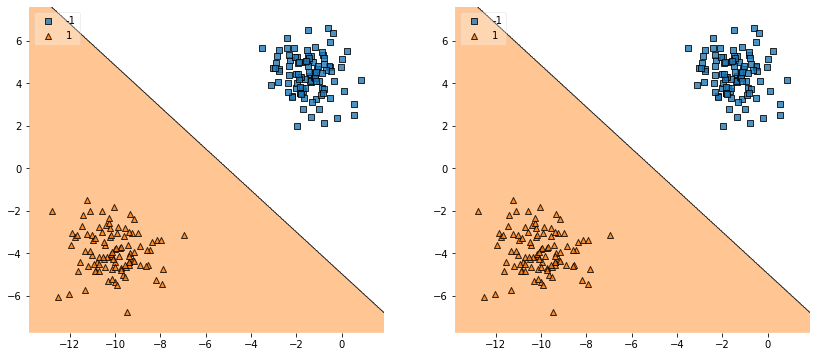

In [5]:
# Visualize performance. 
fig, (ax0, ax1) = plt.subplots(1, 2, figsize = (14, 6))

# My implimentation vs sklearn's.
plot_decision_regions(X, y_int_32, clf = model,         legend = 2, ax = ax0)
plot_decision_regions(X, y_int_32, clf = sklearn_model, legend = 2, ax = ax1)

plt.show()

<br />

**Author:** RYAN PETERS

## References:

<a id = "1">[1]</a>: https://xavierbourretsicotte.github.io/SVM_implementation.html

<a id = "2">[2]</a>: https://see.stanford.edu/materials/aimlcs229/cs229-notes3.pdf

<a id = "3">[3]</a>: https://www.cs.cornell.edu/courses/cs4780/2018fa/lectures/lecturenote09.html 

<a id = "4">[4]</a>: https://www.youtube.com/watch?v=gBTtR0bs-1k&list=PLhhyoLH6IjfxpLWyOgBt1sBzIapdRKZmj&index=7

<a id = "5">[5]</a>: https://www.youtube.com/watch?v=gBTtR0bs-1k&list=PLhhyoLH6IjfxpLWyOgBt1sBzIapdRKZmj&index=7

<a id = "6">[6]</a>: https://www.cs.cmu.edu/~ggordon/10725-F12/slides/16-kkt.pdf

<a id = "7">[7]</a>: http://www.cs.rpi.edu/~stewart/lec23-post/svms.pdf

<a id = "8">[8]</a>: https://inst.eecs.berkeley.edu/~ee127/sp21/livebook/l_sdual_slater.html
